In [2]:
from pylab import zeros, plot, show, xlabel, ylabel

# Del 2: Bærekraftig vekst

<img src="bilder/kaniner_3.png" align="right">

I del 1 så vi at vår eksponentielle vekst modell fører til 2.5 millioner kaniner på øya etter 100 år! Med denne modellen vil befolkningen bare vokse helt uhemmet, og det er det rett og slett ikke plass til!



Problemet er at matematiske modellen vi har lagd så langt har ikke noen form for *bærekraftig vekst*. Øya vår har jo ikke mat, eller plass, til uendelig med kaniner. Derfor ønsker vi en modell hvor **vekstraten endrer seg basert på hvor mange kaniner som er på øya fra før**. Vi ønsker altså en modell på formen:

$ \Huge{k_{t+1} = k_t + r(k_t) k_t}. $

Det naturlige spørsmålet vårt nå er hvilken form vi tror at $r(k)$ skal ha. La oss starte med noen observasjoner.

 1. Øya har en bæreevne, $N$, som er antallet kaniner øya har plass og mat til.
 1. Hvis $k_t \approx 0$ så ønsker vi eksponensiell vekst for da er bæreevnen mye høyere enn antallet dyr. 
    * Altså er den ubegrensede vekstraten, $r(0) = r_0 > 0$.
 1. Hvis $k_t \approx N$ så ønsker vi at det skal være ca like mange dyr på øya hvert år.
    * Altså er $r(N) = 0$.

Den letteste måten å få en funksjon på denne formen er å tenke seg en rett linje som går igjennom punktene $(0, r_0)$ og $(N, 0)$, slik vi ser i figuren under

<img src="bilder/vekstmengde.png" width="600px" />

Hvis vi bruker funksjonen over for den relative vekstraten så får vi dette uttrykket for $r$:

$ \Large{r(k) = r_0 \left(1 - \frac{k}{N} \right)}. $

## Oppgave 1 a)
Lag en funksjon  
`vekstrate(antall_kaniner)`
som tar inn antall kaniner og returnerer vekstraten for et system bæreevnen $N=5000$ og ubegrensede vekstrate $r_0=0.5$.

In [3]:
def vekstrate(antall_kaniner):
    return 0.5*(1 - antall_kaniner/5000)


## Oppgave 1b)
Test at funksjonen din virker ved å printe ut vekstraten til et system med vekstrate lik 0.5 og bæreevne lik 5000 kaniner. Test ut med 0 kaniner og med 5000 kaniner. Med 0 kaniner skal vekstraten være lik 0.5 og med 5000 kaniner skal vekstraten være 0.

In [4]:
print(vekstrate(0))
print(vekstrate(5000))

0.5
0.0


## Oppgave 2
Koden under simulerer eksponentiell vekst med en konstant vekstrate på 200. Modifiser koden slik ut du istedet simulerer en øy med bæreevne på 5000 og ubegrenset vekstrate på 0.5 i 40 år.

### Hint:
 * Formelen for eksponentiell vekst er beskrevet i teksten over
 * Du trenger kan bruke `vekstrate` funkjsonen du lagde i oppgave 1a)

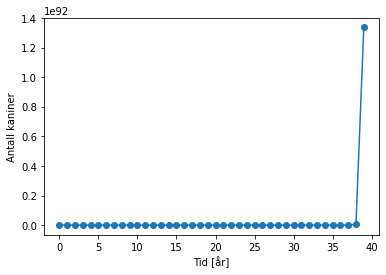

In [5]:
antall_år = 40

k = zeros(antall_år)
k[0] = 200

for t in range(antall_år - 1):
    k[t+1] = k[t] + 200*k[t]


plot(range(antall_år), k, '-o')
xlabel('Tid [år]')
ylabel('Antall kaniner')
show()

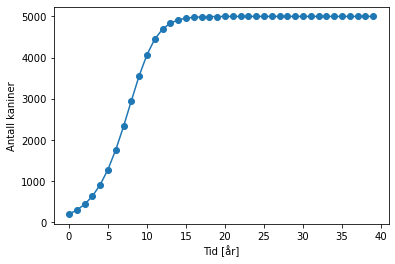

In [6]:
antall_år = 40

k = zeros(antall_år)
k[0] = 200

for t in range(antall_år - 1):
    k[t+1] = k[t] + vekstrate(k[t])*k[t]


plot(range(antall_år), k, '-o')
xlabel('Tid [år]')
ylabel('Antall kaniner')
show()

## Oppgave 3
Gjør om koden over til å bruke en glidebryter (slider) som kan endre den ubegrensede vekstraten og bæreevnen. Vekstraten skal kunne være mellom `0.0` og `3.5` og bæreevnen skal kunne være mellom `100` og `10000`.

### Hint:
  * Du må opprette en funksjon som tar inn vekstraten og bæreevnen, simulerer øya og plotter resultatet.
    * Denne funksjonen kan f.eks. hete `plott_bærekraftig_vekst(bæreevne, ubegrenset_vekstrate)`
  * Inni denne funksjonen kan du opprette en ny vekstrate-funksjon
  * Du må bruke `interact` funksjonen, hvis du ikke husker hvordan den fungerte kan du se på *Intro til notebook* notatboka.

In [7]:
from ipywidgets import interact

def plott_bærekraftig_vekst(bæreevne, ubegrenset_vekstrate):
    def vekstrate(antall_kaniner):
        return ubegrenset_vekstrate*(1 - antall_kaniner/bæreevne)
    antall_år = 40

    k = zeros(antall_år)
    k[0] = 200

    for t in range(antall_år - 1):
        k[t+1] = k[t] + vekstrate(k[t])*k[t]


    plot(range(antall_år), k, '-o')
    xlabel('Tid [år]')
    ylabel('Antall kaniner')
    show()
    
interact(plott_bærekraftig_vekst, bæreevne=(100, 10000), ubegrenset_vekstrate=(0.0, 3.5))

interactive(children=(IntSlider(value=5050, description='bæreevne', max=10000, min=100), FloatSlider(value=1.7…

<function __main__.plott_bærekraftig_vekst(bæreevne, ubegrenset_vekstrate)>

## Oppgave 4
Utforsk effekten av forskjellige parametre på simuleringen.

## Oppgave 5
Hva tror du vil skje dersom øya starter med flere kaniner enn bæreevnen kan tåle?

 a) Skriv ned hva du tror kommer til å skje og hvorfor
 
 b) Oppdater koden du lagde i oppgave 3 slik at du også har en slider for hvor mange kaniner du kan starte med
 
 c) Bruk glidebryteren til å se om du hadde rett i a)

In [8]:
from ipywidgets import interact

def plott_bærekraftig_vekst(start_antall_kaniner, bæreevne, ubegrenset_vekstrate):
    def vekstrate(antall_kaniner):
        return ubegrenset_vekstrate*(1 - antall_kaniner/bæreevne)
    antall_år = 40

    k = zeros(antall_år)
    k[0] = start_antall_kaniner

    for t in range(antall_år - 1):
        k[t+1] = k[t] + vekstrate(k[t])*k[t]


    plot(range(antall_år), k, '-o')
    xlabel('Tid [år]')
    ylabel('Antall kaniner')
    show()
    
interact(plott_bærekraftig_vekst, start_antall_kaniner=(0, 1000), bæreevne=(100, 10000), ubegrenset_vekstrate=(0.0, 3.5))

interactive(children=(IntSlider(value=500, description='start_antall_kaniner', max=1000), IntSlider(value=5050…

<function __main__.plott_bærekraftig_vekst(start_antall_kaniner, bæreevne, ubegrenset_vekstrate)>